# Load the data and libraries

**Load the libraries**

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


**Load the data**

In [138]:
train=pd.read_csv('/content/bank.csv',sep=";")

**Audit the data**

In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [140]:
train.shape

(41188, 21)

In [141]:
train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

This shows that there are no null values

In [142]:
train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Q1) Basic Primary analysis

In [143]:
sns.set_style("darkgrid")
plt.figure(figsize=(7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Axes: >

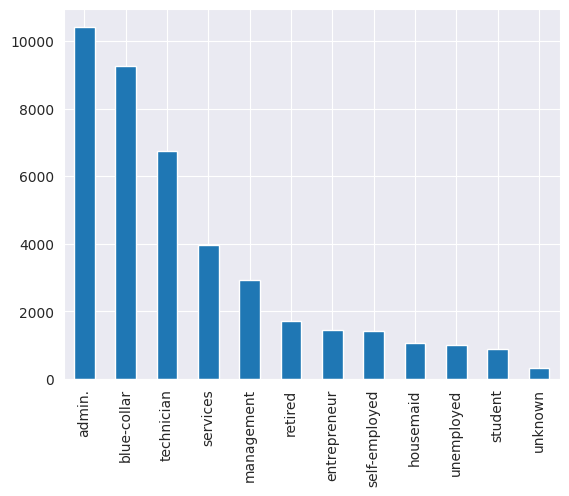

In [144]:
train['job'].value_counts().plot(kind='bar')

from the above bar graph we can observe that there are more Admins by profession

<Axes: >

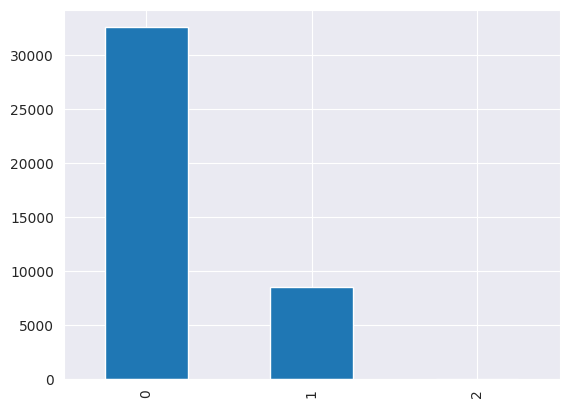

In [187]:
train['default'].value_counts().plot(kind='bar')

There are less number of deaulters when compared to non defaulters

<Axes: >

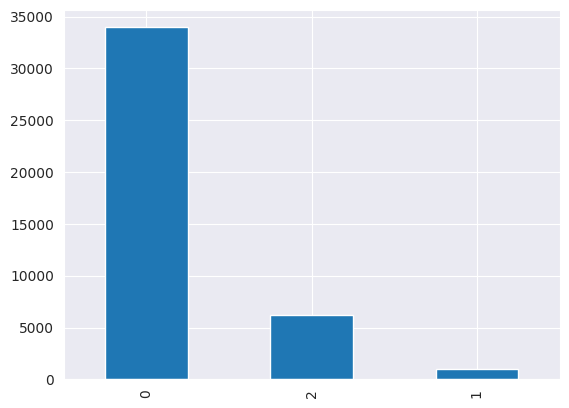

In [188]:
train['loan'].value_counts().plot(kind='bar')

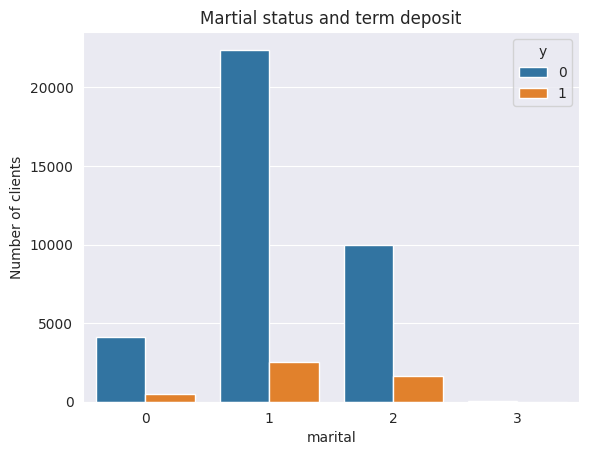

In [190]:
plt.title('Martial status and term deposit')
plt.ylabel('Number of clients')
sns.countplot(x="marital",data=train,hue='y')
plt.show()


In terms of marital status whether it is married, single, divorced are not subscribed to term deposit

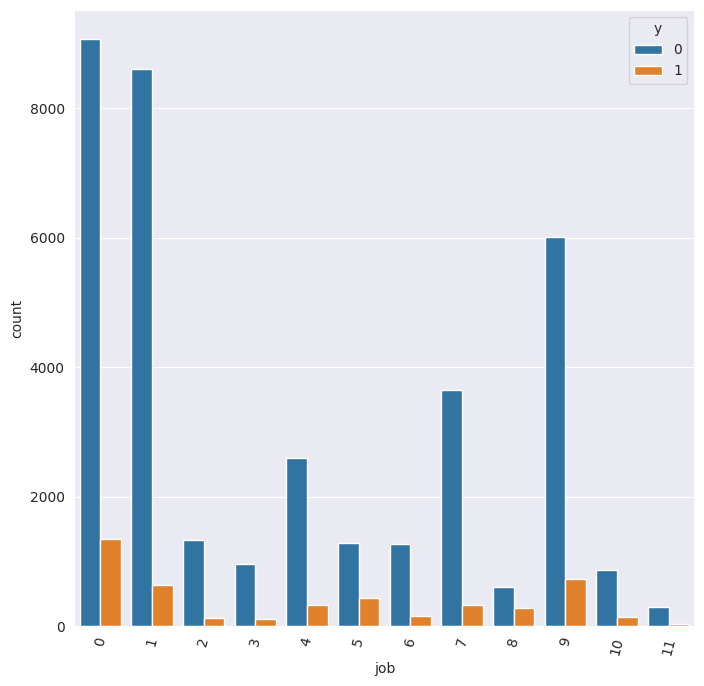

In [189]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=75)
sns.countplot(x="job",data=train,hue='y')
plt.show()

In terms of job the admin has subscribed to term deposit than any other working persons

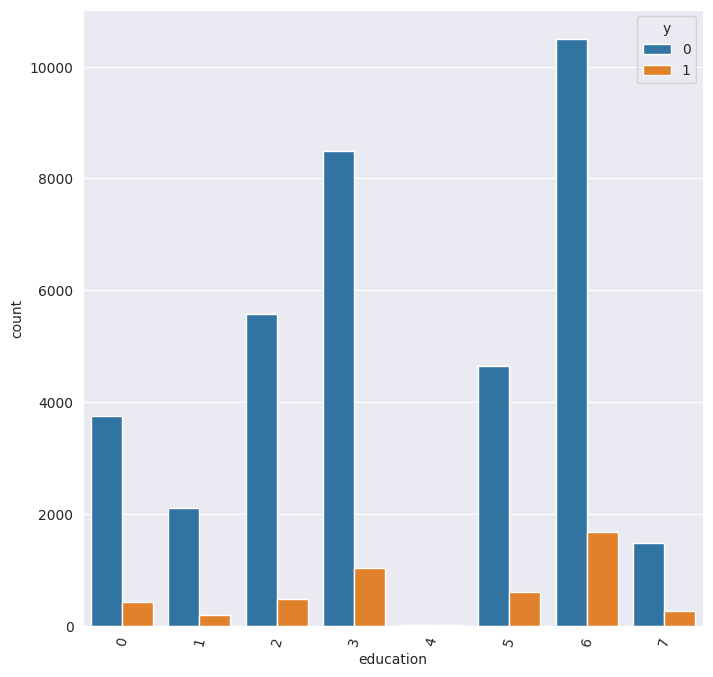

In [191]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=75)
sns.countplot(x="education",data=train,hue='y')
plt.show()

in terms of education , university degree has subscribed to the term deposit than any other education qualification

<ipython-input-192-b37b55417e95>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['previous'], kde = True)


<Axes: xlabel='previous', ylabel='Density'>

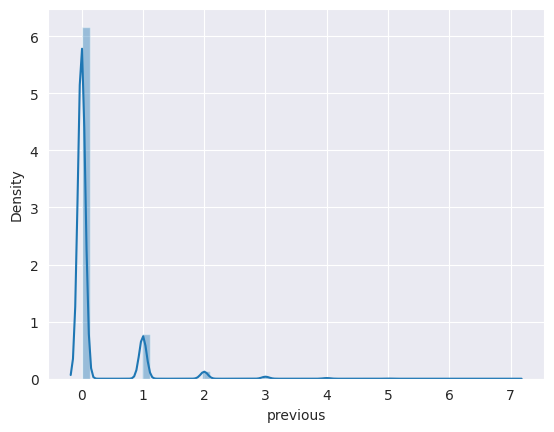

In [192]:
sns.distplot(train['previous'], kde = True)

<ipython-input-193-a1e5b8101dbb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['poutcome'], kde = True)


<Axes: xlabel='poutcome', ylabel='Density'>

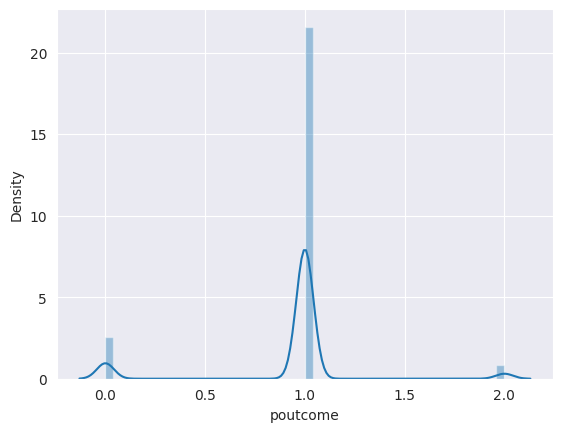

In [193]:
sns.distplot(train['poutcome'], kde = True)

<ipython-input-195-42e964850ce2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['contact'], kde = True)


<Axes: xlabel='contact', ylabel='Density'>

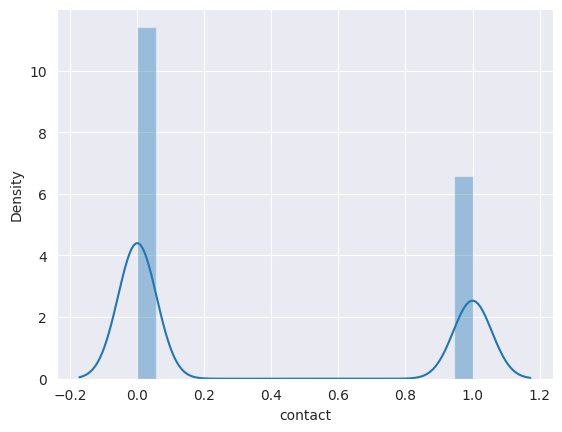

In [195]:
sns.distplot(train['contact'], kde = True)

<ipython-input-196-220798d4b6b9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['month'], kde = True)


<Axes: xlabel='month', ylabel='Density'>

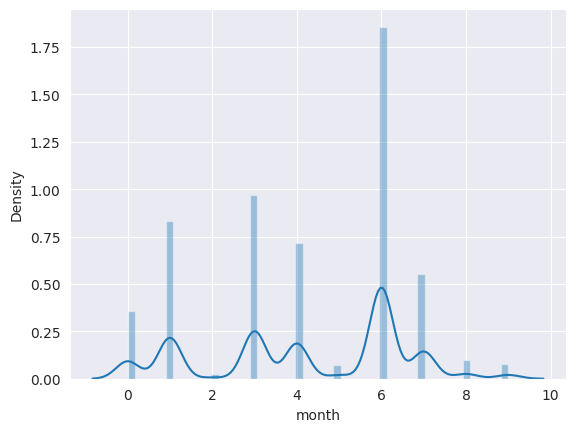

In [196]:
sns.distplot(train['month'], kde = True)

In [148]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

From the above information it shows that there is no missing values in the dataset

<ipython-input-149-524d9f1c5a2e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<Axes: >

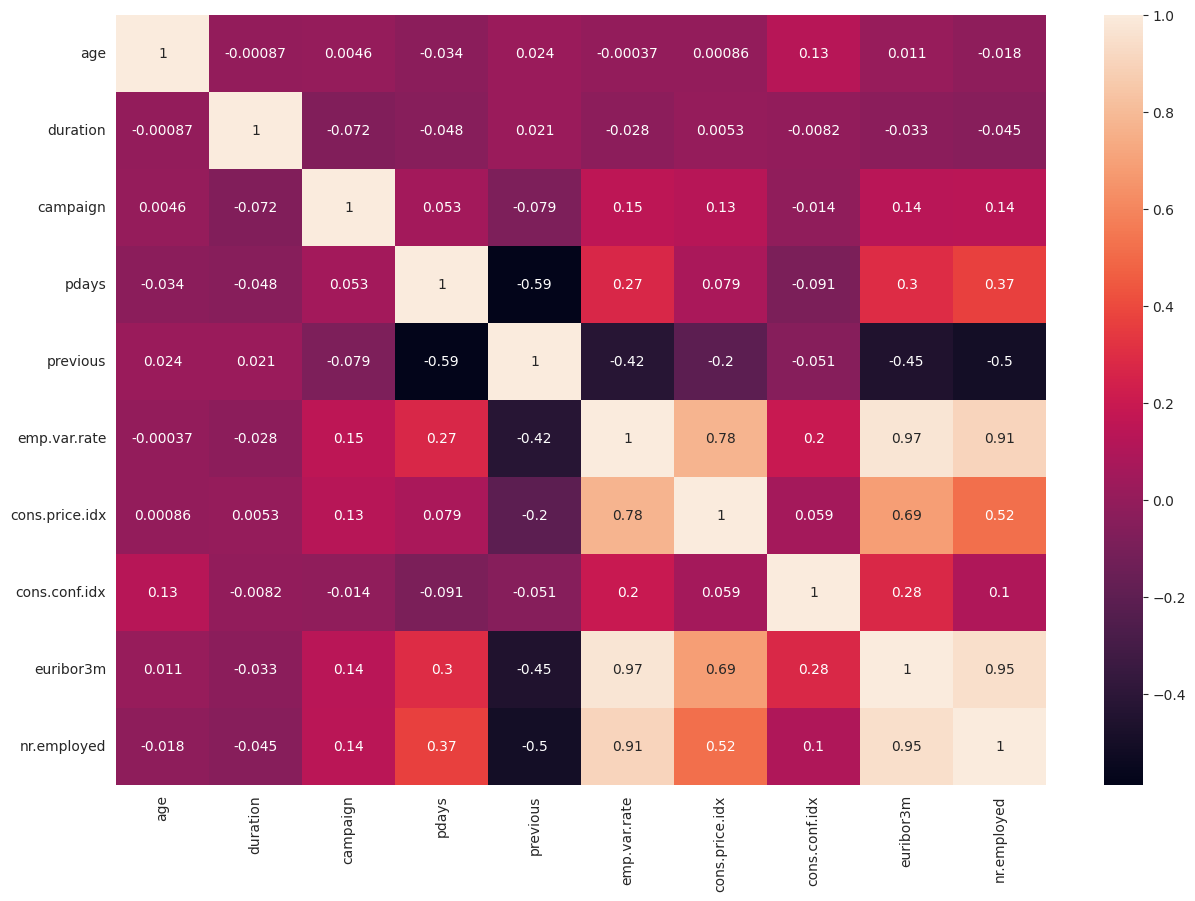

In [149]:
f, ax = plt.subplots(figsize=(15,10 ))
sns.heatmap(train.corr(),annot=True)

**b.Performing lable encoding as most of the data types are object**

In [150]:
from sklearn.preprocessing import LabelEncoder

In [151]:
def encode(data):
  le=LabelEncoder()
  for i in data.columns:
    if data[i].dtype=='object':
      data[i]=le.fit_transform(data[i])
  return(data)

In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [153]:
encode(train)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [154]:
train.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368,0.007021,-0.024877,-0.017572,...,0.004594,-0.034369,0.024365,0.019750,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,...,-0.006923,-0.028468,0.020965,0.011504,-0.008271,-0.016017,0.052760,-0.007880,-0.019574,0.025122
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,...,-0.007240,-0.037942,0.038689,0.001912,-0.084210,-0.057477,-0.033783,-0.091939,-0.086199,0.046203
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.082684,-0.017986,...,0.000371,-0.046626,0.038831,0.017009,-0.043778,-0.081607,0.078799,-0.036380,-0.041492,0.057799
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,...,0.032825,0.080062,-0.102416,0.023417,0.203263,0.168073,0.026522,0.195336,0.189845,-0.099352
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,...,-0.011010,-0.010551,0.021314,-0.011783,-0.060196,-0.080504,-0.033845,-0.059277,-0.045862,0.011552
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,...,0.005166,0.000345,-0.001327,-0.001511,0.001849,-0.002430,-0.012025,0.000125,0.003903,-0.004909
contact,0.007021,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,...,0.077368,0.117970,-0.212848,0.118744,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,-0.024877,-0.033213,-0.007629,-0.082684,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,...,-0.062059,-0.047891,0.103157,-0.065012,-0.178782,-0.004239,0.009652,-0.117264,-0.221425,-0.006065
day_of_week,-0.017572,-0.000844,0.002202,-0.017986,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,...,-0.038288,-0.009531,-0.004102,0.018732,0.033245,0.005644,0.041465,0.039043,0.028380,0.015967


**Splitting the data**

In [155]:
x=train.drop(['y'],axis=1)
y=train['y']

In [156]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


**Train test split**

In [157]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=123)

*   80% of the data is gone to train set
*   20% of the data is gone to test set



In [158]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32950, 20)
(8238, 20)
(32950,)
(8238,)


**c.Selecting important features based on Random Forest**

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
rf=RandomForestClassifier(n_estimators=100,max_depth=5,verbose=1,oob_score=True)
#fit the model
rf.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.7s


RandomForestClassifier(max_depth=5, oob_score=True, verbose=1)

In [161]:
feature_scores = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

duration          0.338143
nr.employed       0.184623
euribor3m         0.153160
poutcome          0.070537
pdays             0.067441
emp.var.rate      0.044587
cons.price.idx    0.039998
cons.conf.idx     0.039295
month             0.018261
previous          0.014061
contact           0.008182
age               0.007910
day_of_week       0.003992
campaign          0.002851
education         0.002441
job               0.001649
default           0.001236
marital           0.000777
housing           0.000550
loan              0.000307
dtype: float64

The Most important feature is Duration and the least important feature is Housing

In [162]:
feature_scores.head(5)

duration       0.338143
nr.employed    0.184623
euribor3m      0.153160
poutcome       0.070537
pdays          0.067441
dtype: float64

**d. Handling unbalanced data using SMOTE**



<ipython-input-163-0d7fdd35eb84>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y',data=train,palette='autumn')


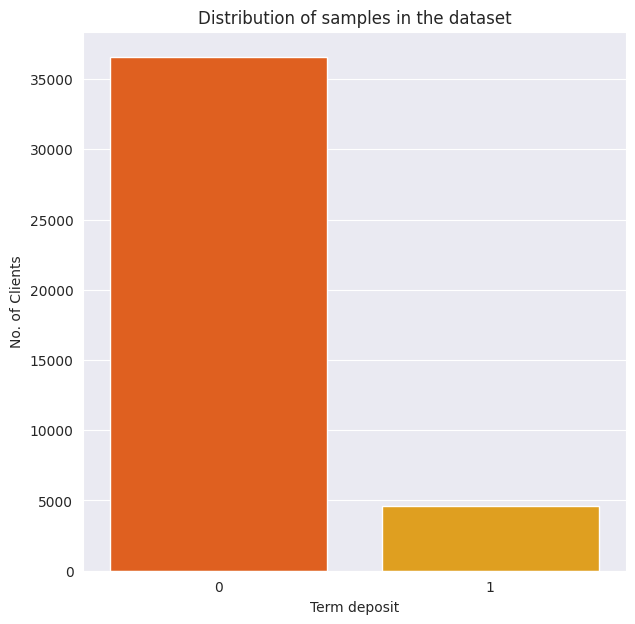

In [163]:
plt.figure(figsize=(7,7))
#checking for the distribution of samples in the dataset
plt.title('Distribution of samples in the dataset')
sns.countplot(x='y',data=train,palette='autumn')
plt.xlabel('Term deposit')
plt.ylabel('No. of Clients')
plt.show()

From the above plot, it is evident that the dataset is highly imbalanced as there are unequal distribution of classes within a dataset.

In [164]:
pip install imblearn

In [165]:
import collections

In [166]:
x_train.shape

(32950, 20)

In [167]:
from imblearn.over_sampling import SMOTE
counter=collections.Counter(y_train)
print('Before Sampling',counter)
smt=SMOTE()
x_train_smote,y_train_smote=smt.fit_resample(x_train,y_train)
counter=collections.Counter(y_train_smote)
print('After Sampling',counter)

Before Sampling Counter({0: 29250, 1: 3700})
After Sampling Counter({0: 29250, 1: 29250})


**e.Feature scaling**

In [168]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train_smote= st_x.fit_transform(x_train_smote)
x_test= st_x.transform(x_test)

# Q3) Building the model

**a. Logistic Regression **




In [169]:
from sklearn.linear_model import LogisticRegression

In [170]:
Logistic_model=LogisticRegression()
Logistic_model.fit(x_train_smote,y_train_smote)

LogisticRegression()

In [171]:
LogisticRegression()

LogisticRegression()

In [172]:
Logistic_model.score(x_train_smote, y_train_smote)

0.8819316239316239

In [173]:
predict_test = Logistic_model.predict(x_test)

**Performance Metrics**

In [174]:
from sklearn.metrics import accuracy_score
accuracy_test = accuracy_score(y_test,predict_test)

In [175]:
print('accuracy score on test dataset : ', accuracy_test)

accuracy score on test dataset :  0.8704782714251031


In [176]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_test))


              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7298
           1       0.46      0.80      0.59       940

    accuracy                           0.87      8238
   macro avg       0.72      0.84      0.75      8238
weighted avg       0.91      0.87      0.88      8238



In [177]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict_test)

array([[6416,  882],
       [ 185,  755]])



*  True positive: 6422
*   True Negative: 755
*   False positive:185
*   False Negative:876





<Axes: >

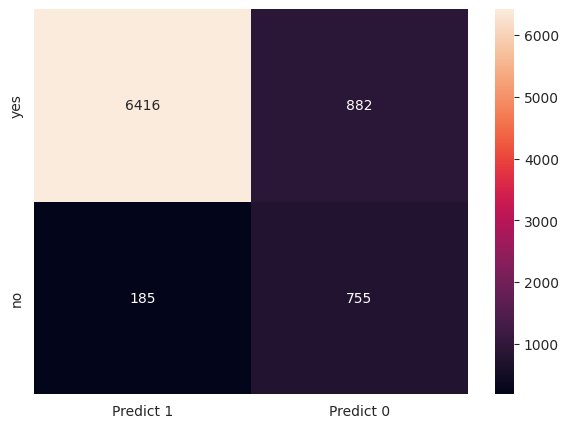

In [178]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,predict_test)

df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')


B.ADABOOST

In [179]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=150, learning_rate=1, random_state=0)
# Train Adaboost Classifer
adaboost_model = ada.fit(x_train_smote, y_train_smote)
y_pred = adaboost_model.predict(x_test)


In [180]:
from sklearn.metrics import accuracy_score
accuracy_test_ada = accuracy_score(y_test,predict_test)
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.8931779558145181


In [181]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7298
           1       0.52      0.71      0.60       940

    accuracy                           0.89      8238
   macro avg       0.74      0.81      0.77      8238
weighted avg       0.91      0.89      0.90      8238



In [182]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[6694,  604],
       [ 276,  664]])

*   True positive: 6701
*   True negative:663
*   False Positive:277
*   False Negative:597



# Q4) Inference from the model

In [183]:
d=[['Logistic Regression',accuracy_test],['AdaBoost', accuracy_score(y_test, y_pred)]]
df1 = pd.DataFrame(d, columns = ['Model','Test_Accuracy'])
print(df1)


                 Model  Test_Accuracy
0  Logistic Regression       0.870478
1             AdaBoost       0.893178


In [184]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[6694,  604],
       [ 276,  664]])

The True Positive value is high in AdaBoost proving that it is the best model

In [185]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict_test)

array([[6416,  882],
       [ 185,  755]])

The True Positive value is less in LogisticRegression model

<Axes: >

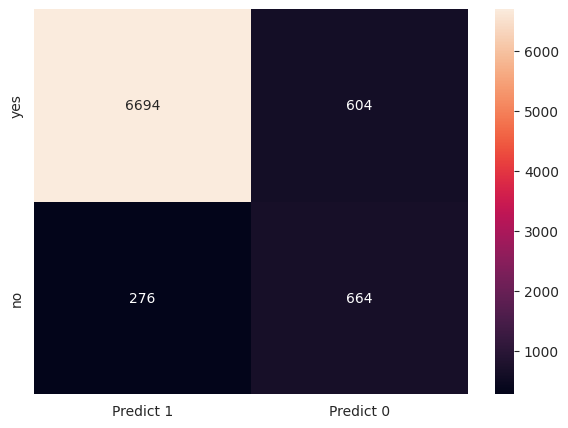

In [186]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')



The True Positive value is high in AdaBoost proving that it is the best model when compared to logistic regression